In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('TRAFFIC_LIGHTS/TRAIN',
                                                 target_size = (240,240),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 237 images belonging to 4 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_set = test_datagen.flow_from_directory('TRAFFIC_LIGHTS/VALIDATION',
                                            target_size=(240, 240),
                                            batch_size=32,
                                            class_mode='categorical')

Found 124 images belonging to 4 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

C:\Users\SAISANTHOSH\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [8]:
import tensorflow as tf

# Define the CNN model
cnn = tf.keras.models.Sequential()

# Update the Input layer to specify the new input shape
cnn.add(tf.keras.layers.Input(shape=(240, 240, 3)))

# Add convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flatten the output and add dense layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))  # Dropout layer to reduce overfitting

# Output layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn.fit(x=training_set, validation_data=test_set, epochs=100, batch_size=32)  # Adjust batch_size if needed


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2873 - loss: 3.6724

C:\Users\SAISANTHOSH\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.2914 - loss: 3.5894 - val_accuracy: 0.2500 - val_loss: 1.3760
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.3668 - loss: 1.4711 - val_accuracy: 0.5887 - val_loss: 1.2061
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.5938 - loss: 1.1398 - val_accuracy: 0.7419 - val_loss: 0.6635
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.6760 - loss: 0.9227 - val_accuracy: 0.7581 - val_loss: 0.7401
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.7292 - loss: 0.7614 - val_accuracy: 0.8629 - val_loss: 0.4616
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.7369 - loss: 0.6947 - val_accuracy: 0.8790 - val_loss: 0.3308
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8127 - loss: 0.5034 - val_accuracy: 0.8871 - val_loss: 0.3592
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.8455 - loss: 0.4527 - val_accuracy: 0.9274 - val_loss: 0.4048
Epoch 9/100


In [9]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 238, 238, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 236, 236, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 118, 118, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 116, 116, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 114, 114, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 57, 57, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 207936)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      26,615,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,046,062 (305.35 MB)

 Trainable params: 26,682,020 (101.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,364,042 (203.57 MB)

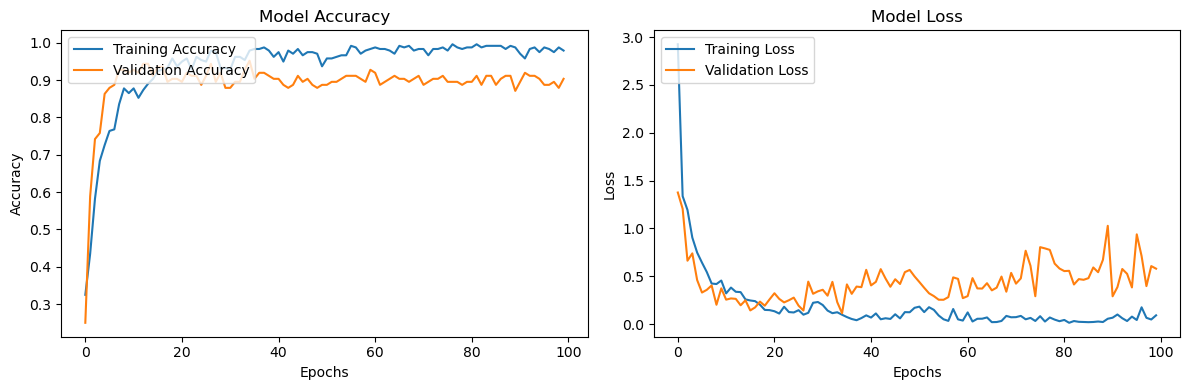

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


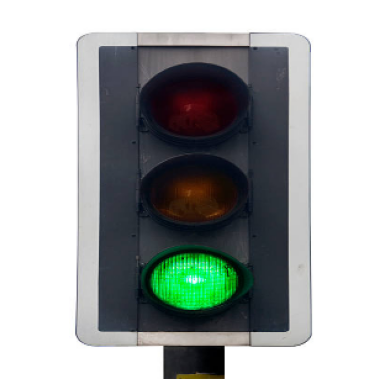

Green


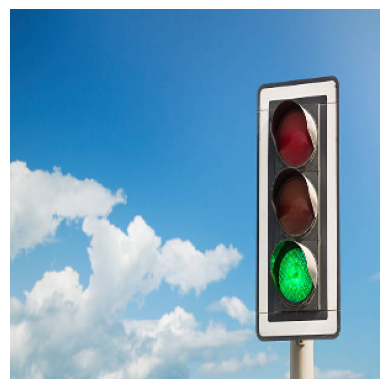

Green


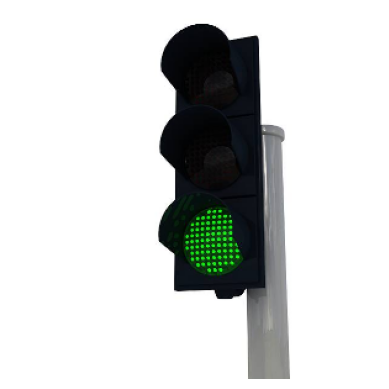

Green


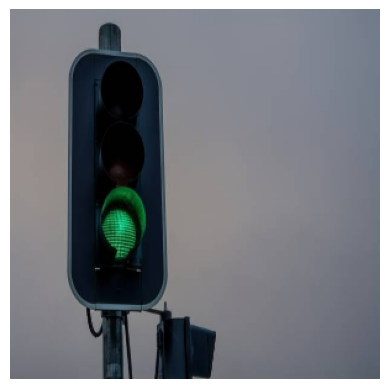

Green


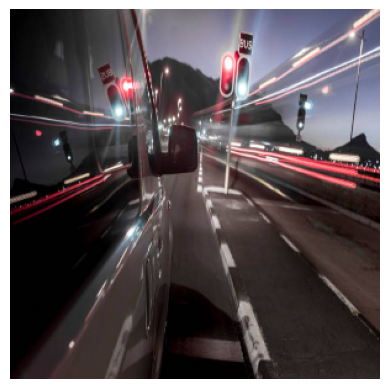

Red


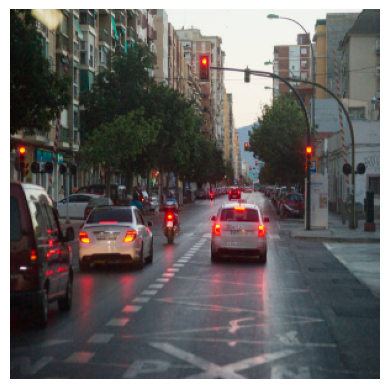

Red


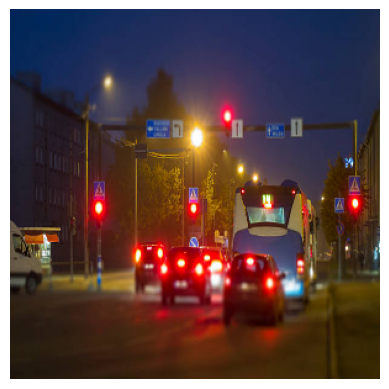

Red


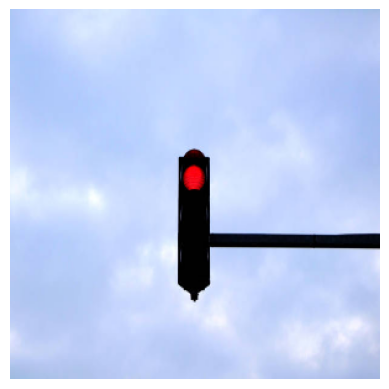

Red


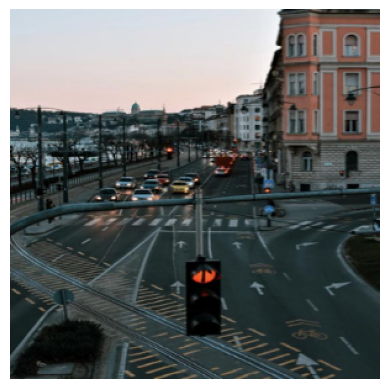

Red


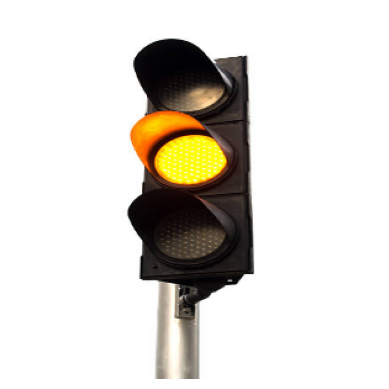

Yellow


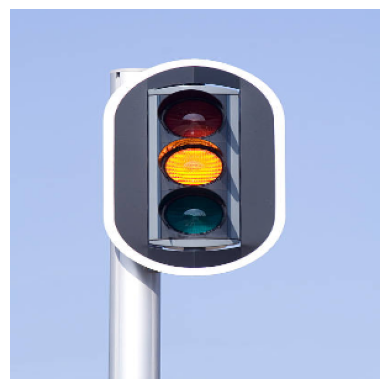

Yellow


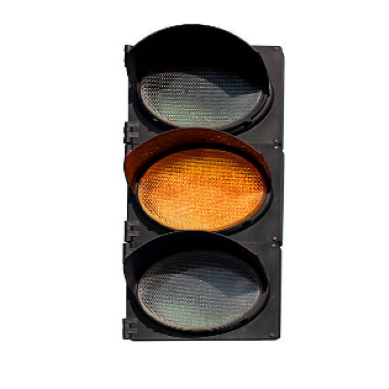

Yellow


In [18]:
import os
from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

test_image_dir = 'TRAFFIC_LIGHTS/TEST_IMAGES/'

image_size = (240, 240)

test_images = []
image_names = []
for img_name in os.listdir(test_image_dir):
    img_path = os.path.join(test_image_dir, img_name)
    
    img = image.load_img(img_path, target_size=image_size)
    
    img_array = image.img_to_array(img) / 255.0
    test_images.append(img_array)
    image_names.append(img_name)

test_images = np.array(test_images)

predictions = cnn.predict(test_images)
# print(predictions)

predicted_classes = np.argmax(predictions, axis=1)
# print(predicted_classes)



for img_name, pred_class in zip(image_names, predicted_classes):
    img_path = os.path.join(test_image_dir, img_name)
    
    # Load image for display using OpenCV
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (300, 300))
    
    # Determine the predicted class label
    
    if pred_class == 0:
        label = "Cant determine"
    elif pred_class == 1:
        label = "Green"
    elif pred_class == 2:
        label = "Red"
    else:
        label = "Yellow"

    plt.imshow(img_resized)
    
    plt.axis('off')
    
    plt.show()
    
    print(f"{label}")


In [19]:
cnn.save('RGY_TRAFFIC_LIGHT_DET.h5')